In [13]:
import torch

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")


GPU 0: NVIDIA GeForce RTX 3090


In [14]:
probs = [0.405, 0.225, 0.108, 0.027, 0.108, 0.027, 0.1]
sum(probs)

1.0

In [15]:
scale = 4
gt_size = [512, 512]

In [16]:
(['gt_channel_order', 'img_path', 'gt_img_output_channel_order', 'ori_gt_shape', 'gt_img_enable_norm', 'gt_output_channel_order', 'ori_img_shape', 'img_color_type', 'img_channel_order', 'img_output_channel_order', 'gt_path', 'gt_img_std', 'gt_color_type', 'gt_img_mean', 'sample_idx', 'padding_size', 'gt_img', 'output', 'input'])

['gt_channel_order',
 'img_path',
 'gt_img_output_channel_order',
 'ori_gt_shape',
 'gt_img_enable_norm',
 'gt_output_channel_order',
 'ori_img_shape',
 'img_color_type',
 'img_channel_order',
 'img_output_channel_order',
 'gt_path',
 'gt_img_std',
 'gt_color_type',
 'gt_img_mean',
 'sample_idx',
 'padding_size',
 'gt_img',
 'output',
 'input']

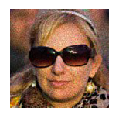

In [17]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2

import os
import sys

sys.path.append(os.path.abspath(".."))
from project_config import DATASET_VAL_DIR_PATH

lq_file = os.path.join(DATASET_VAL_DIR_PATH, "LQ", "00000.png") 

lq = cv2.imread(lq_file, cv2.IMREAD_COLOR)

plt.figure(figsize=(1.28, 1.28))
plt.imshow(lq[..., ::-1], interpolation='none')
plt.axis('off')
plt.show()

In [18]:
lq.shape

(128, 128, 3)

In [ ]:
lq = cv2.resize(lq, (512,512), interpolation=cv2.INTER_NEAREST)
lq.shape

(512, 512, 3)

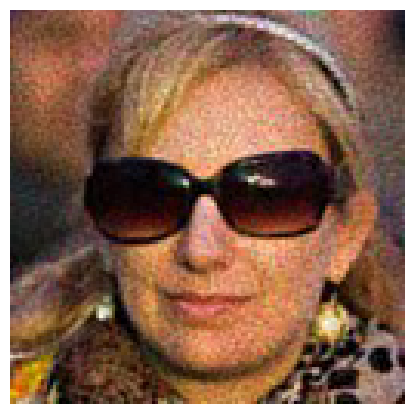

In [ ]:
plt.figure(figsize=(5.12, 5.12))
plt.imshow(lq[..., ::-1], interpolation='none')
plt.axis('off')
plt.show()

In [ ]:
scale = 4
lq_torch = torch.from_numpy(lq).permute(2, 0, 1).unsqueeze(0)
#lq_torch = torch.from_numpy(lq)
lq_torch.shape, lq_torch.size()

(torch.Size([1, 3, 512, 512]), torch.Size([1, 3, 512, 512]))

In [ ]:
lq_torch=F.interpolate(lq_torch, scale_factor=scale, mode='nearest')
lq_torch.shape

torch.Size([1, 3, 2048, 2048])

In [ ]:
lq = lq_torch.squeeze(0).permute(1, 2, 0).numpy()
lq.shape

(2048, 2048, 3)

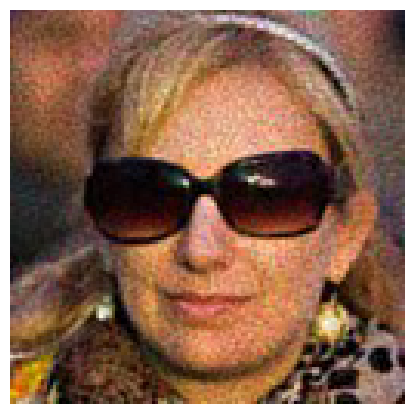

In [ ]:
plt.figure(figsize=(5.12, 5.12))
plt.imshow(lq[..., ::-1], interpolation='none')
plt.axis('off')
plt.show()